# Phase-1 IndiaMart Hackathon
This notebook is a working prototype solution to gauge the appropriate unit wise price range for the 3 categories(Gloves,Kurtas,Drills) based on their units by removing outliers from the data.

**Instructions for running this notebook**


*   Jupyter notebook is needed to run this notebook, if it is not available, Please use Colab from google  to run it.
*   required libraries to run this notebook are pandas,numpy,seaborn and scipy.
*   Incase you are running this notebook please make sure all **.csv** files are uploaded 











In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.signal import argrelextrema
from scipy import stats

We can import the required data either from the folder or our git repository.
The given .xlsx file is split into Three parts and and converted to .csv file which is easy to handle.

In [0]:
try:
    drilldf = pd.read_csv('./phaseone-drill.csv')
    glovedf = pd.read_csv('./phaseone-gloves.csv')
    kurtadf = pd.read_csv('./phaseone-kurta.csv')
except:
    try:
        drilldf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-drill.csv')
        glovedf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-gloves.csv')
        kurtadf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-kurta.csv')
    except:
        print("no file found and no internet connection")


The following piece of code prints out all unique units of the three item given.

In [3]:
drill_units=drilldf['Unit'].unique()
print(drill_units,'drills')
glove_units=glovedf['Unit'].unique()
print(glove_units,'gloves')
kurta_units=kurtadf['Unit'].unique()
print(kurta_units,'kurtas')

['Piece' 'Piece(s)' 'pack' 'unit' 'Number' 'Unit' 'Pack' '1nos' 'Unit(s)'
 'kit' 'Set' 'Pc_Onwards' 'ONWARDS' 'Kit'] drills
['Pair' 'Piece' 'pack' 'Unit' 'Pack' 'Unit/Onwards' 'Pair(s)' 'unit' 'Set'
 'Pieces'] gloves
['Piece' 'dollar' 'Packet' 'piece' 'Meter' 'Piece(s)' 'Set' 'Per piece'
 'Unit' '1' '1pc' 'Box' '170 per peice' 'Unstitch' 'Barrel' 'Carton'
 'peice' 'Pieces' 'Sets' 'Unit(s)' 'one' 'Bag' 'Selfie Kurtis' 'Pack'
 'Pair' 'Pound' 'Peice' '1piece' 'No' 'Kilogram' 'Number' "40' Container"
 'pack' '100 pic' 'Year' "20' Container" 'Pcs' 'Piece(s) Onwards' 'One'
 'kurtI' 'Ounce' 'onwards' '10-10000' 'per piese' 'Day' 'Set(s)'
 '12 units' '1pis' 'Onwards' 'One peace' 'Set(S)' 'Pair piece' 'Ounce(s)'
 'Packet(s)' 'Single' 'one pcs' 'Pc' '4 pcs' '4 units' '5' 'set' 'kurti'
 'pcs' 'pices' 'Pics' 'single piece' 'pi' 'per piece' 'Kurti' 'one unit'
 '1 piece' '1 pice' 'Suit' 'pair piece' '10' 'pieces' '1pcs' '1 pc'
 '3 set' 'Xl size' '1000 per unit' '1pcd' 'Psc' 'Gram' 'Rs' 'in' '1 pcs'


## Cleaning Data

### Impact Drill

First we will check count of each unique unit.

In [4]:
drilldf['Unit'].value_counts()

Piece         119
pack           47
unit           25
Unit           17
Number         14
Pack            9
Pc_Onwards      5
Piece(s)        5
kit             1
Kit             1
Unit(s)         1
1nos            1
ONWARDS         1
Set             1
Name: Unit, dtype: int64

Following units are unsignificant in Impact Drill dataframe.

'Pc_Onwards', 'ONWARDS', 'Set', 'Kit', 'kit'

We have to remove them.

In [0]:
removal=['Pc_Onwards', 'ONWARDS', 'Set', 'Kit', 'kit']
for each in removal:
    drilldf=drilldf.drop(drilldf[(drilldf['Unit']==each)].index)

Let us assume that all other units, are trying to represent a single piece of impact drill. So, drill dataframe is cleaned. Below table represents the description of data.

In [6]:
drilldf.describe()

,Price
count,238.000000
mean,6571.428571
std,9709.722619
min,2.000000
25%,2100.000000
50%,2999.500000
75%,5939.000000
max,55000.000000


This is a normal scatter plot of Price.

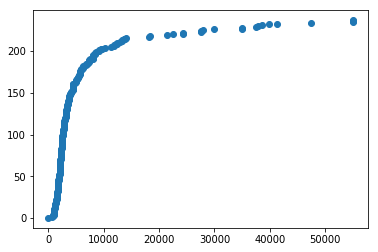

In [7]:
array=np.arange(238)
plt.scatter(drilldf['Price'],array);

### Leather safety gloves

Let us know the count of each unique unit.

In [8]:
glovedf['Unit'].value_counts()

Pair            113
unit              9
Piece             6
pack              5
Pack              3
Unit              3
Pair(s)           2
Pieces            1
Unit/Onwards      1
Set               1
Name: Unit, dtype: int64

Some of the above units like 'Pack', 'Set', 'pack' are unsignificant as we do not know how many are inside that. 'Unit/Onwards' is also unsignificant as that is like a starting range for the product. We assume remaining all units 'Pair', 'Piece', 'pack', 'Unit','Pair(s)' 'unit', 'Pieces' are trying to represent the same, which is 'Pair', a pair of leather gloves.

In [0]:
glovedf=glovedf.drop(glovedf[(glovedf['Unit']=='Pack')].index)
glovedf=glovedf.drop(glovedf[(glovedf['Unit']=='pack')].index)
glovedf=glovedf.drop(glovedf[(glovedf['Unit']=='Set')].index)

Let us know the mean price of each significant unit.

In [10]:
for each in glove_units:
    print(each,glovedf[glovedf['Unit']==each]['Price'].mean())

Pair 102.5575221238938
Piece 136.66666666666666
pack nan
Unit 318.6666666666667
Pack nan
Unit/Onwards 100.0
Pair(s) 315.0
unit 2442.777777777778
Set nan
Pieces 695.0


Below table represents the description of data.

In [11]:
glovedf.describe()

,Price
count,135.000000
mean,272.407407
std,898.047453
min,10.000000
25%,50.000000
50%,90.000000
75%,180.000000
max,8978.000000


This is a normal scatter plot of Price.

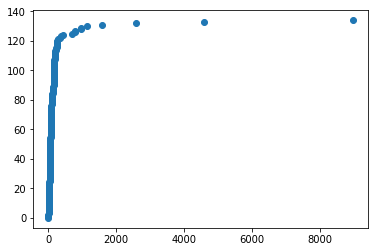

In [12]:
array=np.arange(135)
plt.scatter(glovedf['Price'],array);

### Ladies Kurta

In kurta dataframe, there are many meaningless units (Unsignificant to be specific). 
Those are 'dollar', 'Packet', 'Meter', 'Set', 'Box', '170 per peice', 'Unstitch', 'Barrel', 'Carton', 'Sets', 'Bag', 'Selfie Kurtis', 'Pack', 'Pair', 'Pound', 'Kilogram', "40' Container", 'pack', '100 pic', 'Year', "20' Container", 'Ounce', '10-10000', 'Day', 'Set(s)', 'Set(S)', 'Pair piece', 'Ounce(s)', 'Packet(s)', 'set', 'Suit', 'pair piece', '3 set', 'Gram', 'Rs', 'Feet', '1000 per unit','in','5','10','Piece(s) Onwards','onwards','Onwards','Xl size'. Let us remove them all.

In [0]:
removal=['dollar', 'Packet', 'Meter', 'Set', 'Box', '170 per peice', 'Unstitch', 'Barrel', 'Carton', 'Sets', 'Bag', 'Selfie Kurtis', 'Pack', 'Pair', 'Pound', 'Kilogram', "40' Container", 'pack', '100 pic', 'Year', "20' Container", 'Ounce', '10-10000', 'Day', 'Set(s)', 'Set(S)', 'Pair piece', 'Ounce(s)', 'Packet(s)', 'set', 'Suit', 'pair piece', '3 set', 'Gram', 'Rs', 'Feet', '1000 per unit','in','5','10','Piece(s) Onwards','onwards','Onwards','Xl size']

In [0]:
for each in removal:
    kurtadf=kurtadf.drop(kurtadf[(kurtadf['Unit']==each)].index)

In [15]:
kurta_units=kurtadf['Unit'].unique()
print(kurta_units,'kurtas')

['Piece' 'piece' 'Piece(s)' 'Per piece' 'Unit' '1' '1pc' 'peice' 'Pieces'
 'Unit(s)' 'one' 'Peice' '1piece' 'No' 'Number' 'Pcs' 'One' 'kurtI'
 'per piese' '12 units' '1pis' 'One peace' 'Single' 'one pcs' 'Pc' '4 pcs'
 '4 units' 'kurti' 'pcs' 'pices' 'Pics' 'single piece' 'pi' 'per piece'
 'Kurti' 'one unit' '1 piece' '1 pice' 'pieces' '1pcs' '1 pc' '1pcd' 'Psc'
 '1 pcs' 'onepices'] kurtas


Some units like '4 pcs', '4 pieces', '12 units' are unsignificant, but they contain significant information about the price. We can divide the price by 4 for the unit '4 pcs' to know the price of each.

In [0]:
kurtadf.loc[(kurtadf['Unit']=='4 units'),'Price']=kurtadf.loc[(kurtadf['Unit']=='4 units'),'Price']/4
kurtadf.loc[(kurtadf['Unit']=='4 pcs'),'Price']=kurtadf.loc[(kurtadf['Unit']=='4 pcs'),'Price']/4
kurtadf.loc[(kurtadf['Unit']=='12 units'),'Price']=kurtadf.loc[(kurtadf['Unit']=='12 units'),'Price']/12

Let us know the count of each unique and significant unit.

In [17]:
kurtadf['Unit'].value_counts().head(15)

Piece       3334
Piece(s)     500
1             76
Unit          63
piece         38
No            37
Number        23
Pieces        13
Unit(s)       11
one            3
1piece         3
Psc            3
kurti          3
peice          3
1pc            3
Name: Unit, dtype: int64

Let us find the mean price for each unit.

In [18]:
kurtadf.describe()

,Price
count,4149.000000
mean,787.490600
std,2178.518976
min,1.000000
25%,325.000000
50%,500.000000
75%,800.000000
max,109000.000000


This is a normal scatter plot of Price.

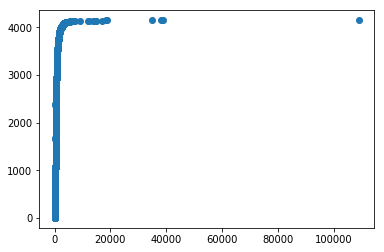

In [19]:
array=np.arange(4149)
plt.scatter(kurtadf['Price'],array);

## Removing Outliers : Calculating Z-score
Z-score is meausure of how much given sample is deviating compared to Standaed deviation.
In python the function is available in scipy.stats which we are using in the following cells.

**Note:** we are calculating only absolute values as sign of z-score doesn't matter in finding outliers.






In [0]:
drill_z = np.abs(stats.zscore(drilldf['Price']))
glove_z = np.abs(stats.zscore(glovedf['Price']))
kurta_z = np.abs(stats.zscore(kurtadf['Price']))

After obtaing z-score we are not considering all entries whse z-score is greater than 3 or less than -3 and also we are considering only some units values as unit conversion is not as indicative as the sugar example given.

In [0]:
npa=drilldf[(drill_z < 3)]['Price']
npa1=glovedf[(glove_z < 3)]['Price']
npa2=kurtadf[(kurta_z < 3)]['Price'][:-1]

The following 3 cells describe the data taken for consideration

In [22]:
drilldf[(drill_z < 3)].describe()

,Price
count,229.000000
mean,5049.799127
std,5860.012946
min,2.000000
25%,2079.000000
50%,2890.000000
75%,5600.000000
max,35000.000000


In [23]:
glovedf[(glove_z < 3)].describe()

,Price
count,133.000000
mean,174.511278
std,306.394962
min,10.000000
25%,50.000000
50%,85.000000
75%,180.000000
max,2594.000000


In [24]:
kurtadf[(kurta_z < 3)].describe()

,Price
count,4134.000000
mean,699.914006
std,677.359663
min,1.000000
25%,325.000000
50%,500.000000
75%,800.000000
max,6589.000000


The following cell is used to store standard deviation which is very important to calculate the bandwidth in later part

In [25]:
stdev=np.std(npa)
stdev1=np.std(npa1)
stdev2=np.std(npa2)
print(stdev,stdev1,stdev2)

5847.204158821012 305.2409282990938 671.135426301382


## Kernel Density Estimation method for calculation of Probabilty Disribution Function
We are using probability distribution function for find ing require range as pdf is more suitable for finding relationship in general population.

kernel Density Estimation is useful method for calculating pdf from discrete samples.



In [0]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

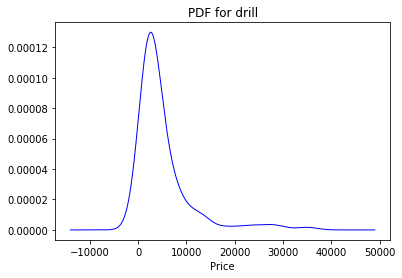

In [27]:
y_grid=np.linspace(np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,np.amax(npa)+(np.amax(npa)-np.amin(npa))*0.4,10000)
ideal=1.06*(np.std(npa))*((len(npa)**(-1/5)))
pdf = kde_scipy(npa, y_grid, bandwidth=ideal)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)
plt.title('PDF for drill')
plt.xlabel('Price')
plt.show()

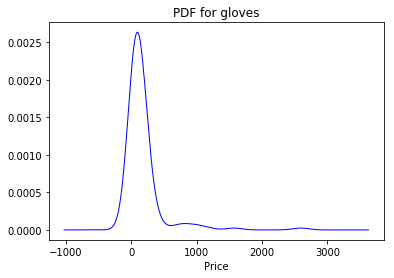

In [28]:
y_grid1=np.linspace(np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4,np.amax(npa1)+(np.amax(npa1)-np.amin(npa1))*0.4,10000)
ideal1=1.06*(np.std(npa1))*((len(npa1)**(-1/5)))
pdf1 = kde_scipy(npa1, y_grid1, bandwidth=ideal1)
plt.plot(y_grid1, pdf1, color='blue', alpha=1, lw=1)
plt.title('PDF for gloves')
plt.xlabel('Price')
plt.show()

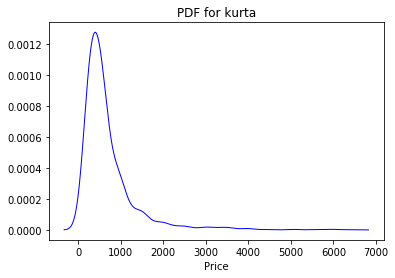

In [29]:
y_grid2=np.linspace(-(np.amax(npa2)-np.amin(npa2))*0.05,np.amax(npa2)*1.05,10000)
ideal2=1.06*(np.std(npa2))*((len(npa2)**(-1/5)))
pdf2 = kde_scipy(npa2, y_grid2, bandwidth=ideal2)
plt.plot(y_grid2, pdf2, color='blue', alpha=1, lw=1)
plt.title('PDF for kurta')
plt.xlabel('Price')
plt.show()

In [30]:
w=((np.amax(npa)-np.amin(npa))*1.8)/10000
w1=((np.amax(npa1)-np.amin(npa1))*1.8)/10000
w2=((np.amax(npa2)-np.amin(npa2))*0.05+np.amax(npa2)*1.05)/10000
print(np.sum(pdf)*w,np.sum(pdf1)*w1,np.sum(pdf2)*w2)

0.9998999999998275 0.9998999999999999 0.9998576396600676


In [31]:
pdf_area=np.zeros(len(pdf)-1)
for a in range(len(pdf_area)):
    pdf_area[a]=(pdf[a]+pdf[a+1])*(w/2)
print(np.sum(pdf_area))


0.9998999999998258


before going to calculation for area we need to make sure that probability of a product price below Rupees 0 is 0( for PDF calculated above we have finite probability for price less than 0 ) we can usee bayes theorem to re calculate the PDF.

\begin{equation*}
PDF(x | Price > 0)   = \frac{probab(x>0)*PDF(x)}{probab(Price >0)}
\end{equation*}
here PDF(x) is the pdf function 

probab(price >0) is probabilty that price >0 which sum of area under pdf for price >0

probab(x>0) is eiter 1 or 0 depending on x

1.0000000000000002


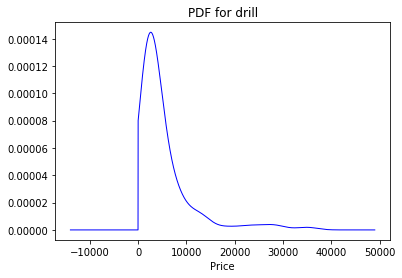

In [32]:
for a in range(len(pdf)):
    if y_grid[a] > 0:
        break
probab=np.sum(pdf[a:])*w
for a in range(len(pdf)):
    if y_grid[a] > 0:
        break
    pdf[a]=0
pdf=pdf/probab
print(np.sum(pdf)*w)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)
plt.title('PDF for drill')
plt.xlabel('Price')
plt.show()

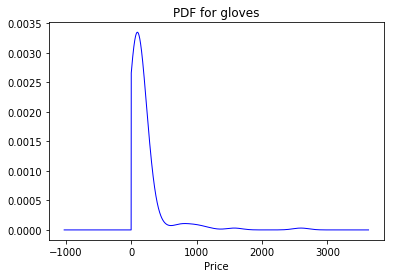

In [33]:
for a in range(len(pdf1)):
    if y_grid1[a] > 0:
        break
probab1=np.sum(pdf1[a:])*w1
for a in range(len(pdf1)):
    if y_grid1[a] > 0:
        break
    pdf1[a]=0
pdf1=pdf1/probab1
plt.plot(y_grid1, pdf1, color='blue', alpha=1, lw=1)
plt.title('PDF for gloves')
plt.xlabel('Price')
plt.show()

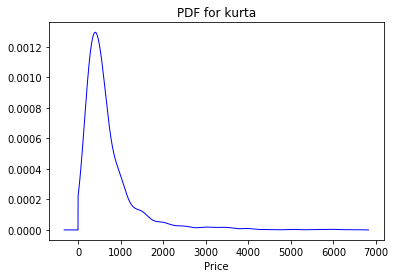

In [34]:
for a in range(len(pdf2)):
    if y_grid2[a] > 0:
        break
probab2=np.sum(pdf2[a:])*w2
for a in range(len(pdf2)):
    if y_grid2[a] > 0:
        break
    pdf2[a]=0
pdf2=pdf2/probab2
plt.plot(y_grid2, pdf2, color='blue', alpha=1, lw=1)
plt.title('PDF for kurta')
plt.xlabel('Price')
plt.show()

## Range calculation from PDF 
We used 2 methods for calculating a range. They are 
1.   Finding the smallest range which covers majority of the region (we can use range which covers 50%/60% (adjustable parameter) of the region). The advantage with this method is it ensures ranges is minimum.(Final method).
2.   Finding the peak and finding a range which covers 50% of the area under pdf and having peak as mean point of that range(it means there is 50% chance for a product to be in that range) this ensures price which has maximum entries lies in that region.


### Method 1


In [43]:
qq1=len(pdf)
for q in range(len(pdf)):
    for p in range(len(pdf)-(q+1)):
        if np.sum(pdf[p:p+q+1])*w > 0.6:
            print(np.sum(pdf[p:p+q+1])*w,p,q)
            break
    if np.sum(pdf[p:p+q+1])*w > 0.6:
        break
print('This is the range obtained for drill ',max(min(npa),int(np.round((p)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4))),'to',int(np.round((p+q+1)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4)))  
     
        

0.6000191161753164 2274 755
This is the range obtained for drill  328 to 5091


In [36]:
qq2=len(pdf1)
for q in range(len(pdf1)):
    for p in range(len(pdf1)-(q+1)):
        if np.sum(pdf1[p:p+q+1])*w1 > 0.75:
            print(np.sum(pdf1[p:p+q+1])*w1,p,q)
            break
    if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
        break
print('This is the range obtained for gloves ',max(min(npa1),int(np.round((p)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4))),int(np.round((p+q+1)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4)))  
 

0.7506199138877543 2201 562
This is the range obtained for gloves  10 262


In [37]:
qq3=len(pdf2)
for q in range(len(pdf2)):
    for p in range(len(pdf2)-(q+1)):
        if np.sum(pdf2[p:p+q+1])*w2 > 0.7:
            print(np.sum(pdf2[p:p+q+1])*w2,p,q)
            break
    if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
        break
print('This is the range obtained for Kurta ',max(min(npa2),int(np.round((p)*w2-(np.amax(npa2)-np.amin(npa2))*0.05))),int(np.round((p+q+1)*w2-(np.amax(npa2)-np.amin(npa2))*0.05)))

0.7000202105467744 589 994
This is the range obtained for Kurta  96 808


### Method-2
Now we will proceed with the 2nd method(peak) we can improve this method by moving with different speed along both sides which can be determined from the graph 





In [38]:
f_peak=argrelextrema(pdf, np.greater)[0][0]
for q in range(f_peak):
    if np.sum(pdf[f_peak-q:f_peak+q])*w > 0.5:
        print(np.sum(pdf[f_peak-q:f_peak+q])*w,q)
        break
print('This is the range obtained for drill ',max(min(npa),int(np.round((f_peak-q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4))),int(np.round((f_peak+q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4)))

0.5010423086461808 301
This is the range obtained for drill  731 4524


In [39]:
f_peak1=argrelextrema(pdf1, np.greater)[0][0]
q=0
for q in range(f_peak1):
    if np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1 > 0.5:
        print(np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1,q)
        break
print('This is the range obtained for gloves ',max(min(npa1),int(np.round((f_peak1-q)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4))),int(np.round((f_peak1+2*q)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4)))

0.5024022928134061 115
This is the range obtained for gloves  42 202


In [40]:
f_peak2=argrelextrema(pdf2, np.greater)[0][0]
for q in range(f_peak2):
    if np.sum(pdf2[f_peak2-q:f_peak2+q])*w2 > 0.5:
        print(np.sum(pdf2[f_peak2-q:f_peak2+q])*w2,q)
        break
print('This is the range obtained for Kurta ',max(min(npa2),int(np.round((f_peak2-q)*w2-(np.amax(npa2)-np.amin(npa2))*0.05))),int(np.round((f_peak2+q)*w2-(np.amax(npa2)-np.amin(npa2))*0.05)))

0.5002419663004121 302
This is the range obtained for Kurta  189 621


## Conclusion
From the above two methods we can conclude the following points.

1.  1st method results in small differnce between minimum and maximum of the price range compared to 2nd method. 
2.  2nd method can be improved by moving in different steps(eg : +p*q,-q compared to +q,-q)the parameter p can be determined from the shape of the graph.

Also we shouldn't allow our final answers go below the minimum or go above the maximum. That is made possible by above piece of code.

Final Ranges:

**Impact Drill:**

Minimum: 734

Maximum: 4524

**Leather Safety Gloves:**

Minimum: 10

Maximum: 262

**Ladies Kurta**

Minimum: 96

Maximum: 808

